In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
import cv2
import numpy as np
import pandas as pd

path = '/kaggle/input/brain-tumor-classification-mri'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

X = []
Y = []

for cls in classes:
    pth = os.path.join(path, 'Training', cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)

np.unique(Y)
pd.Series(Y).value_counts()
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

(1222, 40000)

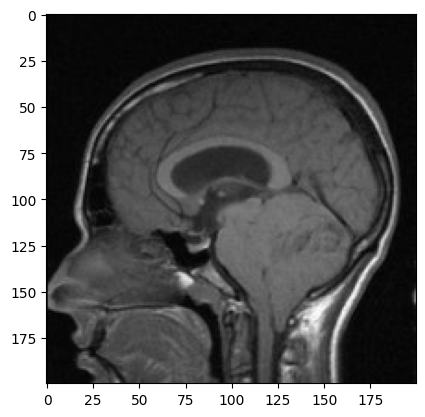

In [3]:
plt.imshow(X[0], cmap='gray')
### Prepare data
X_updated = X.reshape(len(X), -1)
X_updated.shape

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
test_size=.20)
xtrain.shape, xtest.shape
### Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [5]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest


(977, 40000) (245, 40000)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)
sv = SVC()
sv.fit(xtrain, ytrain)
### Evaluation
print("Training Score for Logistic Regression:", lg.score(xtrain, ytrain))
print("Testing Score for Logistic Regression:", lg.score(xtest, ytest))
print("Training Score for SVM:", sv.score(xtrain, ytrain))
print("Testing Score for SVM:", sv.score(xtest, ytest))
### Prediction
pred = sv.predict(xtest)
misclassified=np.where(ytest!=pred)
misclassified
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Training Score for Logistic Regression: 1.0
Testing Score for Logistic Regression: 0.9714285714285714
Training Score for SVM: 0.9928352098259979
Testing Score for SVM: 0.9673469387755103
Total Misclassified Samples:  8
1 1


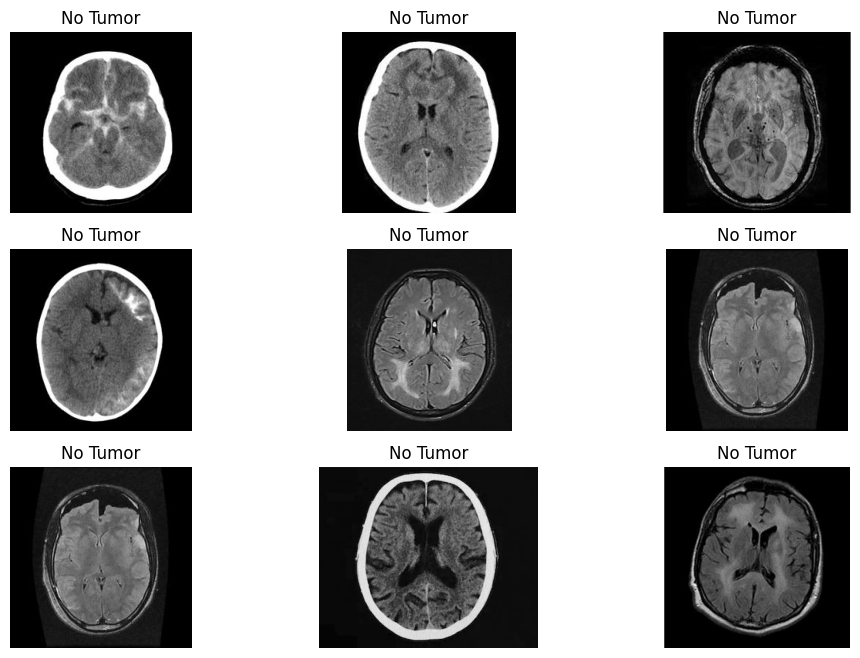

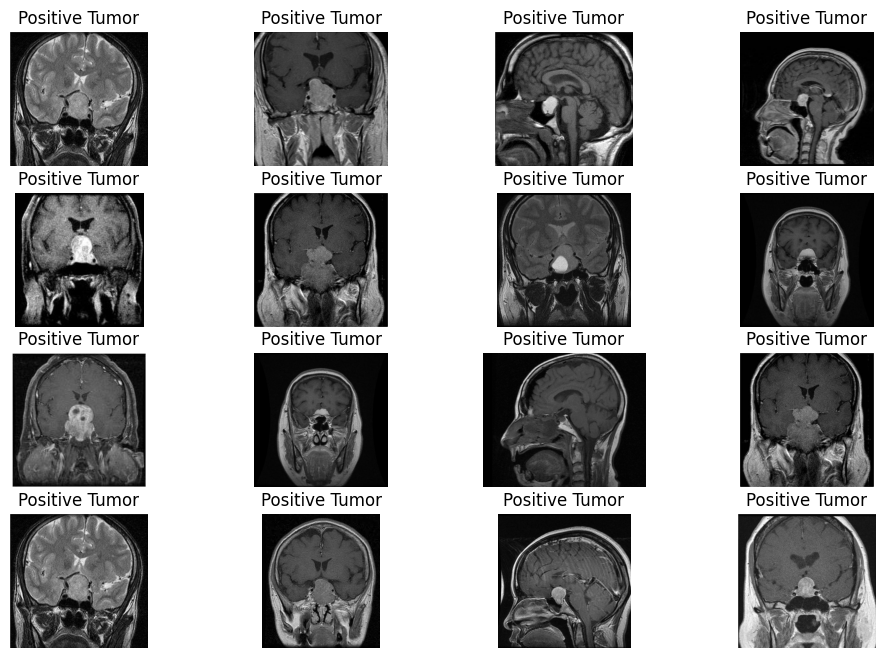

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

dec = {0: 'No Tumor', 1: 'Positive Tumor'}

plt.figure(figsize=(12, 8))
p = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor')
c = 1
for i in p[:9]:
    plt.subplot(3, 3, c)
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    # Assuming sv is your model, make predictions
    # p = sv.predict(img1)
    plt.title(dec[0])  # Assuming 0 means 'No Tumor'
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.figure(figsize=(12, 8))
p = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/')
c = 1
for i in p[:16]:
    plt.subplot(4, 4, c)
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    # Assuming sv is your model, make predictions
    # p = sv.predict(img1)
    plt.title(dec[1])  # Assuming 1 means 'Positive Tumor'
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()
